In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [33]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns='RowNumber')


In [34]:
plt.style.use('default')

# Task 9.1

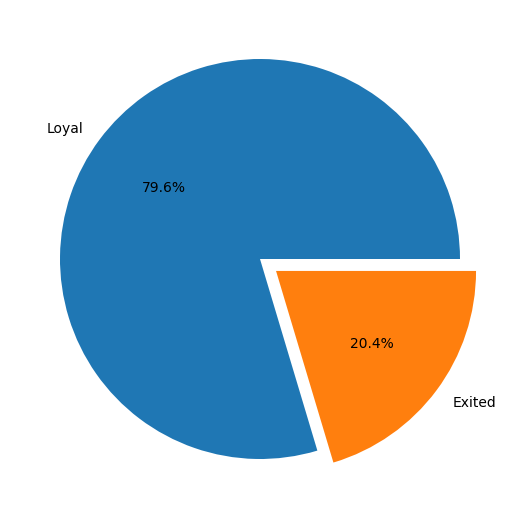

In [35]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Exited' if x == 1 else 'Loyal')
loyality = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyality,
    labels=loyality.index,
    autopct='%.1f%%',
    explode = [0, 0.1]
);

Каждый пятый клиент покидает банк

In [36]:
display(churn_data)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Loyal
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Loyal
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Exited
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Exited


# Task 9.2

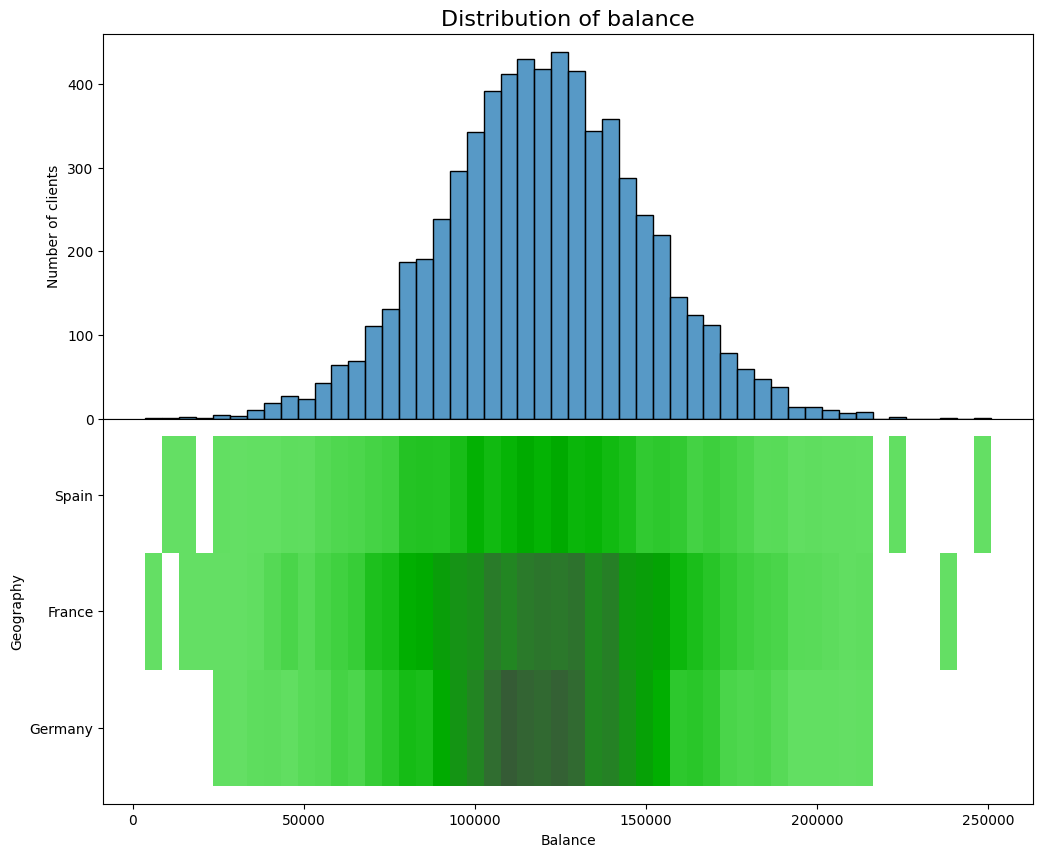

In [37]:
#limit the Balance from below to 2500
croped_churn_data = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

#histogram of balance (total)
histplot1 = sns.histplot(
    data=croped_churn_data, 
    x='Balance', 
    bins=50,
    ax=axes[0],
)
histplot1.set_title('Distribution of balance', fontsize=16)
histplot1.set_xlabel('Balance')
histplot1.set_ylabel('Number of clients')

#histogram of balance  (by country)
histplot2 = sns.histplot(
    data=croped_churn_data,
    x='Balance',
    y='Geography',
    bins=50,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Balance')
histplot2.set_ylabel('Geography')

plt.show()


Основная часть клиентов банка держит на счетах от 100000 до 150000 (К слову, гистограмма практически полностью соответствует нормальному распрелению). При этом в Германии таких клиентов значительно больше по сравнению с Испанией. Франция по этому показателю занимает среднюю позицию

# Task 9.3

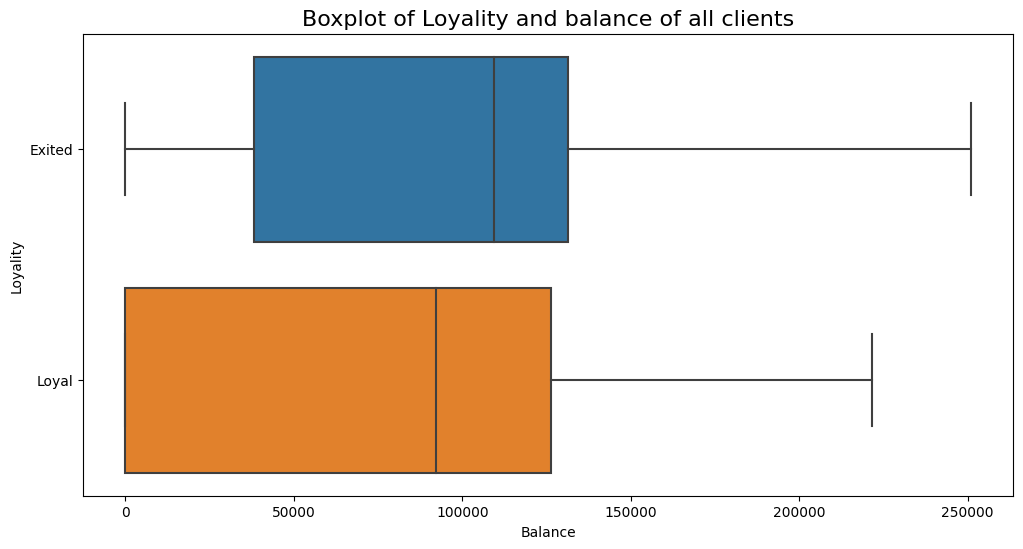

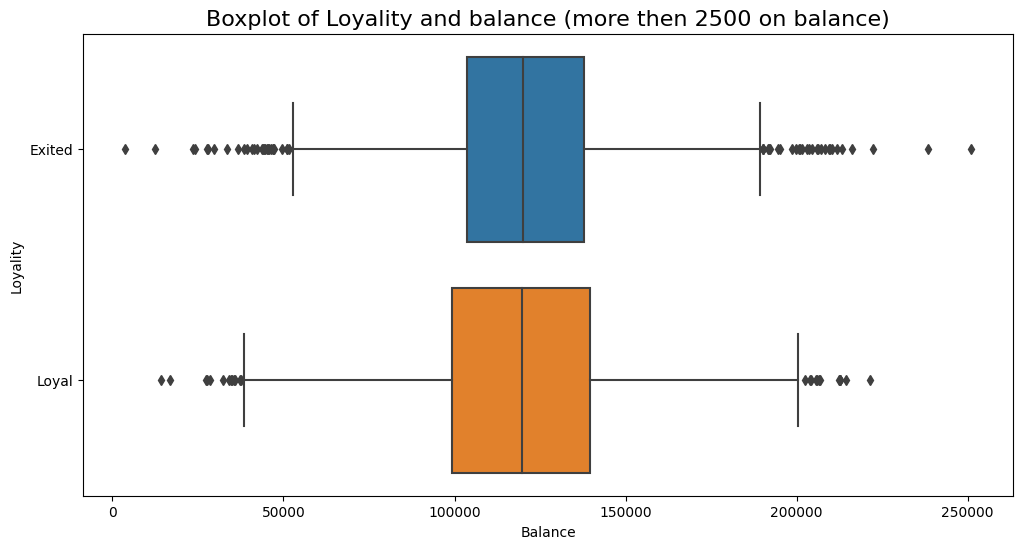

In [53]:
#Boxplot - All Clients
fig = plt.figure(figsize=(12, 6))
boxplot1 = sns.boxplot(data=churn_data, x='Balance', y='Exited', order=['Exited', 'Loyal'])
boxplot1.set_title('Boxplot of Loyality and balance of all clients', fontsize=16)
boxplot1.set_xlabel('Balance')
boxplot1.set_ylabel('Loyality')
plt.show()
#Boxplot - Clients with more then 2500 on balance
fig = plt.figure(figsize=(12, 6))
boxplot2 = sns.boxplot(data=croped_churn_data, x='Balance', y='Exited', order=['Exited', 'Loyal'])
boxplot2.set_title('Boxplot of Loyality and balance (more then 2500 on balance)', fontsize=16)
boxplot2.set_xlabel('Balance')
boxplot2.set_ylabel('Loyality')
plt.show()



Для клиентов, баланс которых более 2500, медианное значение баланса ушедших и лояльных клиентов одинаково. Величина "ящика" немного меньше у ушедших клиентов, но не значительно. А вот число потенциальных выбросов у ушедших клиентов заметно больше, чем у лояльных, и этот факт требует дополнительного анализа.
Если же рассматривать всех клиентов банка, то видно, что около половины лояльных клиентов не имеют средств на балансе. И в данном исследовании эта группа клиентов нас не интересует.

# Task 9.4

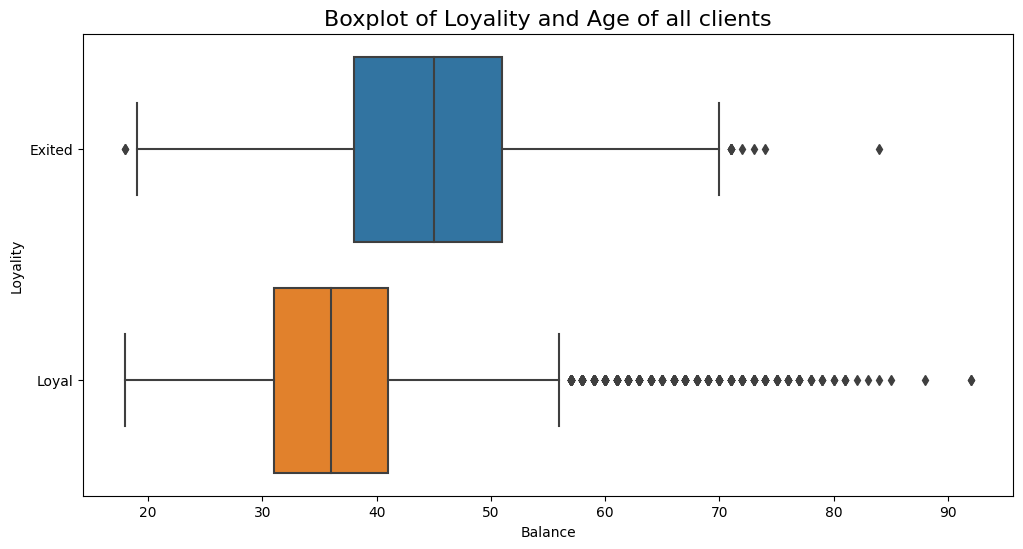

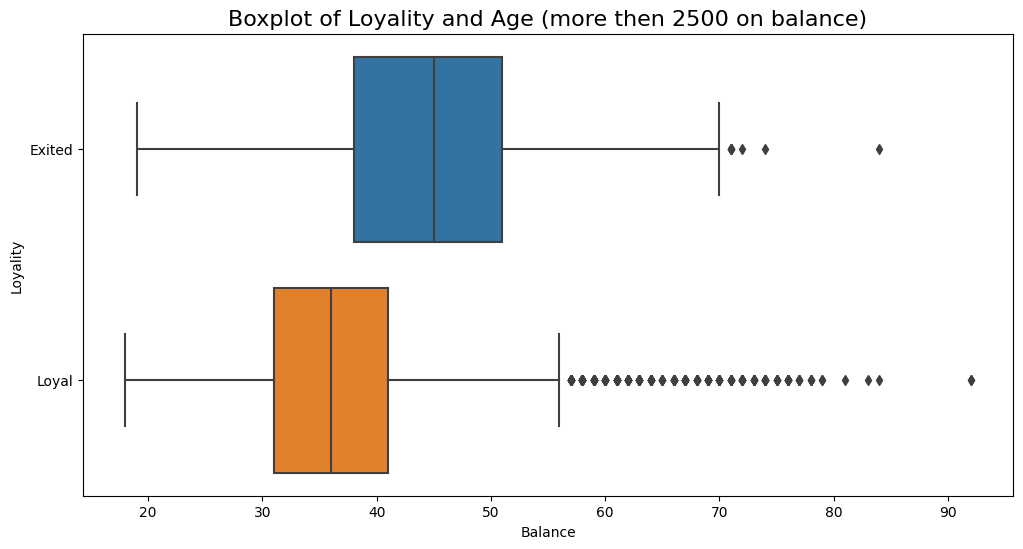

In [54]:
#Boxplot - All Clients
fig = plt.figure(figsize=(12, 6))
boxplot1 = sns.boxplot(data=churn_data, x='Age', y='Exited', order=['Exited', 'Loyal'])
boxplot1.set_title('Boxplot of Loyality and Age of all clients', fontsize=16)
boxplot1.set_xlabel('Balance')
boxplot1.set_ylabel('Loyality')
plt.show()

fig = plt.figure(figsize=(12, 6))
boxplot2 = sns.boxplot(data=croped_churn_data, x='Age', y='Exited', order=['Exited', 'Loyal'])
boxplot2.set_title('Boxplot of Loyality and Age (more then 2500 on balance)', fontsize=16)
boxplot2.set_xlabel('Balance')
boxplot2.set_ylabel('Loyality')
plt.show()


Большое количество потенциальных выбросов в группе лояльнх клиентов. Значительная часть ушедших клиентов имела возраст от 40 до 50 лет (при медианном значении около 45), банку необходимо обратить внимание именно на эту категорию клиентов.

# Task 9.5